In [1]:
import eDiskplot as eplot
import matplotlib.pyplot as plt
from astropy.visualization import AsinhStretch, ImageNormalize
from eDisk_source_dict import source_dict
from qdisk.product import calculate_averaged_spectra, calculate_pvdiagram
from qdisk.model import Keplerian_velocity
import qdisk.utils as utils
%matplotlib widget
%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "xtick.top": True,
    "ytick.right": True})

source = "L1489IRS"
molecular_lines = ["12CO", "13CO", "C18O", "SO"]
imagepath = "/raid/work/yamato/edisk_data/L1489IRS/v0_image/"
productpath = "/raid/work/yamato/eDisk_data/L1489IRS/data_product_test/"
wedge = 90
rmax = 8
rmax_zoomed = 2.5
moment = ["M0", "M1", "M8"]
baseline = "SBLB"
vsys = source_dict[source]["v_sys"]
center_coord = source_dict[source]["radec"]
vrange = 5
data_scaling_factor = {"M0": 1.0,
                       "M1": 1e-3,
                       "M8": 1,}
norm_kwargs = {"M0": dict(stretch=AsinhStretch(a=0.1), vmin=0.0),
               "M1": dict(vmin=vsys-vrange, vmax=vsys+vrange),
               "M8": dict()}
beam_kw = {"M0": dict(fill=True, color="white"),
           "M1": dict(fill=True, color="black"),
           "M8": dict(fill=True, color="white")}
cbar_kw = {"M0": dict(label=r"mJy beam$^{-1}$ km s$^{-1}$"),
           "M1": dict(label=r"km s$^{-1}$"),
           "M8": dict(label=r"K")}
sbar_kw = {"M0": dict(),
           "M1": dict(color="black"),
           "M8": dict(),
}

def get_image_basename(source, baseline, line, robust=0.5, pbcor=False):
    ### get basename of an image based on eDisk naming convention
    imagename = "{:s}_{:s}_{:s}_robust_{:.1f}.image.fits".format(source, baseline, line, robust)
    if pbcor:
        imagename = imagename.replace(".image.fits", ".pbcor.fits")
    return imagename

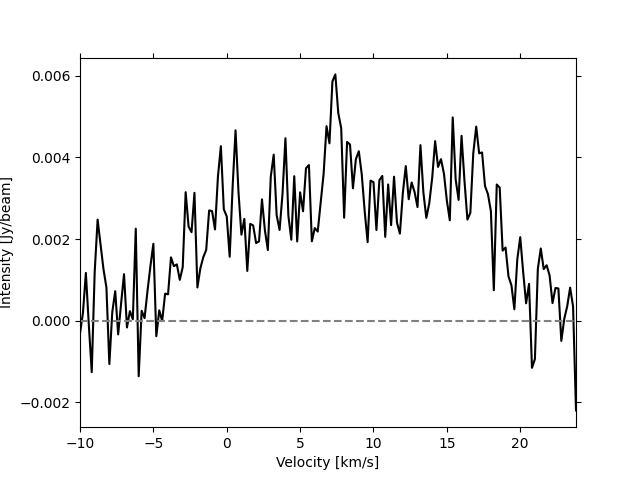

In [2]:
# check SO spectrum
line = "SO"
imagename = imagepath + get_image_basename(source, baseline, line, robust=0.5)

v, spec = calculate_averaged_spectra(imagename, rmin=0.0, rmax=0.2, PA=80, incl=73)

fig, ax = utils.plot_1D_profile(x=v, y=spec)
ax.set(xlabel="Velocity [km/s]", ylabel="Intensity [Jy/beam]")
ax.axhline(y=0.0, color="grey", ls="dashed")

Loading data...
Plotting v = 4.20 km/s...
Plotting v = 4.40 km/s...
Plotting v = 4.60 km/s...
Plotting v = 4.80 km/s...
Plotting v = 5.00 km/s...
Plotting v = 5.20 km/s...
Plotting v = 5.40 km/s...
Plotting v = 5.60 km/s...
Plotting v = 5.80 km/s...
Plotting v = 6.00 km/s...
Plotting v = 6.20 km/s...
Plotting v = 6.40 km/s...
Plotting v = 6.60 km/s...
Plotting v = 6.80 km/s...
Plotting v = 7.00 km/s...


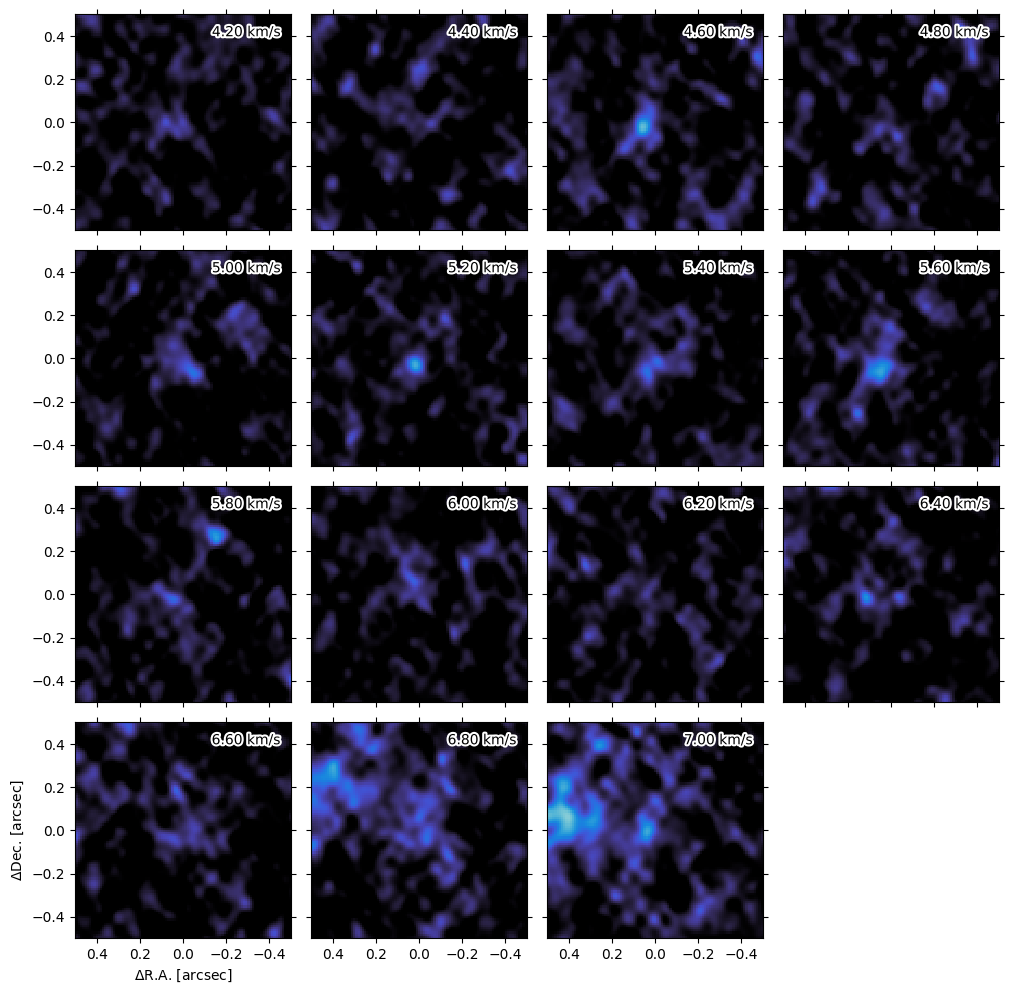

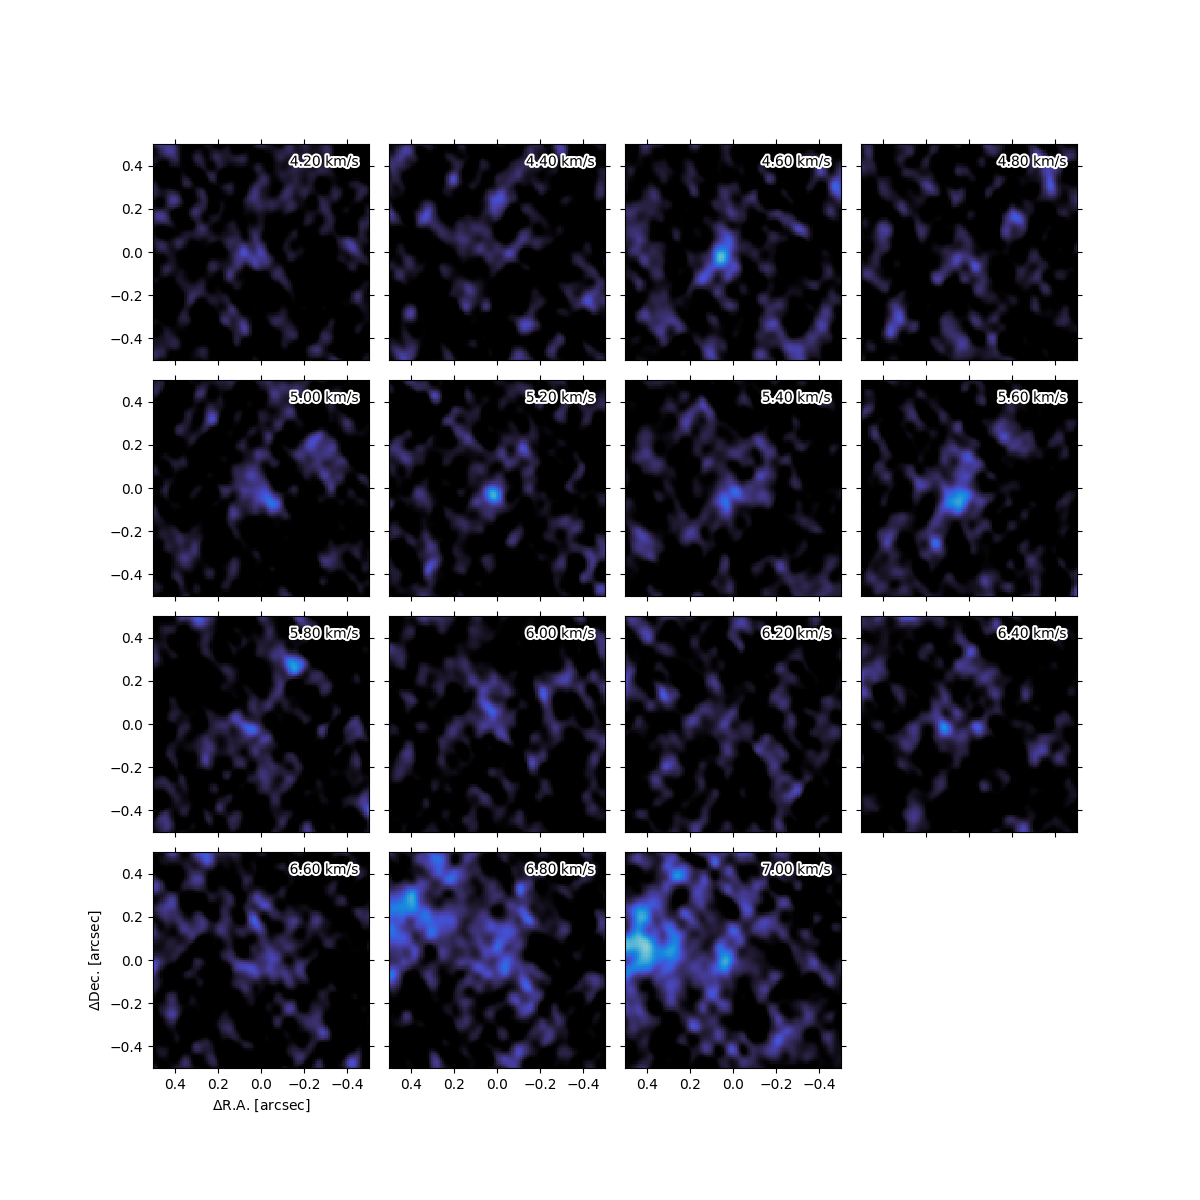

In [34]:
plt.rcParams.update({
    "xtick.top": True,
    "ytick.right": True,
    "xtick.direction": "out",
    "ytick.direction": "out"})

rms = 2.04e-3

eplot.plot_channel_map(imagename, center_coord=center_coord, rmax=0.5, vrange=(4,7), thin=1, sigma_clip=None, rms=rms, pad=0.2)

In [8]:
# PV diagram
posax, velax, diagram = calculate_pvdiagram(imagename, center_coord=center_coord, PA=69, rrange=(-0.5, 0.5))

Loading data ...
Calculating PV diagram...
Done.


(-10.00000005319676, 23.799999943478994)

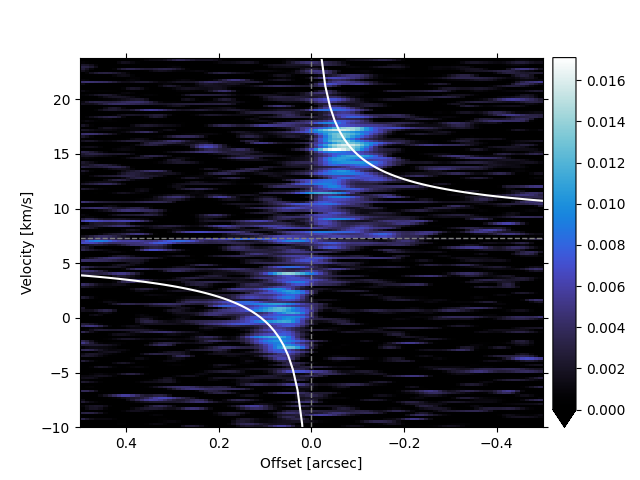

In [21]:
fig, ax = plt.subplots()
utils.plot_2D_map(data=diagram, X=posax, Y=velax, ax=ax, cmap_method="pcolorfast", contour=False, cmap_kw=dict(cmap=eplot.cmap["M0"], norm=ImageNormalize(diagram, vmin=0.0)))
ax.axhline(y=source_dict[source]["v_sys"], color="grey", ls="dashed", lw=1.0)
ax.axvline(x=0.0, color="grey", ls="dashed", lw=1.0)
ax.set(xlabel="Offset [arcsec]", ylabel="Velocity [km/s]")

r = posax.copy()
vkep_r = Keplerian_velocity(r=r[r<0.0], Mstar=1.0, distance=source_dict[source]["distance"], incl=source_dict[source]["incl"]) + source_dict[source]["v_sys"]
vkep_b = - Keplerian_velocity(r=r[r>0.0], Mstar=1.0, distance=source_dict[source]["distance"], incl=source_dict[source]["incl"]) + source_dict[source]["v_sys"]
ax.plot(posax[posax<0.0], vkep_r, color="white")
ax.plot(posax[posax>0.0], vkep_b, color="white")
ax.set_ylim(velax.min(), velax.max())